In [1]:
import numpy as np
import os
import matplotlib.pyplot as plt
import matplotlib as mpl
import pandas as pd
%matplotlib inline

mpl.rcParams["pdf.fonttype"] = 42
mpl.rcParams["font.size"] = 11

from functools import partial, reduce
from itertools import product

import seaborn as sns


from analyze_data import result, get_summary

from create_figures import add_p_bars, boxplot, add_multilevel_xticks, lineplot

from matplotlib.ticker import AutoMinorLocator

def prettify(ax, *args,
             title = None,
             x = ("x-axis", ""),
             y = ("y-axis", ""),
             **kwargs):
    ax.set_title(title)
    ax.spines[['right', 'top']].set_visible(False)
    ax.set_xlabel(x[0] if len(x[1])==0 else f"{x[0]} [{x[1]}]")
    ax.set_ylabel(y[0] if len(y[1])==0 else f"{y[0]} [{y[1]}]")
    ax.yaxis.set_minor_locator(AutoMinorLocator())
    ax.tick_params(which = "both", 
                   direction = "in")
    if ax.get_legend() != None:
        ax.get_legend().set_title("")
        ax.get_legend().set(alpha = 0, frame_on=False)
    return ax


In [2]:
# xl = pd.read_excel(r"E:\diploma_thesis\Data\7. Exocytosed aSyn-GFP gets taken up by untransfected cells\Results_2.xlsx")
# xl["puncta"] = xl["PointCount"] > 0
# xl.to_csv(r"E:\diploma_thesis\Data\7. Exocytosed aSyn-GFP gets taken up by untransfected cells\Results_final.csv", index = False)

In [3]:
p = result().read(r"E:\diploma_thesis\Data\7. Exocytosed aSyn-GFP gets taken up by untransfected cells\Results_final.csv")
p.df = p.df.sort_values(by = ["Group2","Group1"], ascending = False)
p.df.head()

,label,bbox-0,bbox-1,bbox-2,bbox-3,label_aSyn_GFP,bbox-0_aSyn_GFP,bbox-1_aSyn_GFP,bbox-2_aSyn_GFP,bbox-3_aSyn_GFP,...,Replicate,Group1,Group2,path,coord_path,Otsu,Rel,PointCount,int,puncta
2167,1,366,968,995,1498,1,366,968,995,1498,...,1,X,Ctrl,E:\Raphael\Data\7. Exocytosed aSyn-GFP gets ta...,E:\Raphael\Data\7. Exocytosed aSyn-GFP gets ta...,0.000048,1.250000,0,NaN,False
2168,2,1295,430,1635,1031,2,1295,430,1635,1031,...,1,X,Ctrl,E:\Raphael\Data\7. Exocytosed aSyn-GFP gets ta...,E:\Raphael\Data\7. Exocytosed aSyn-GFP gets ta...,0.000048,1.410256,0,NaN,False
2169,3,206,1563,401,1757,3,206,1563,401,1757,...,1,X,Ctrl,E:\Raphael\Data\7. Exocytosed aSyn-GFP gets ta...,E:\Raphael\Data\7. Exocytosed aSyn-GFP gets ta...,0.000049,1.198276,0,NaN,False
2170,6,483,1310,1127,1776,6,483,1310,1127,1776,...,1,X,Ctrl,E:\Raphael\Data\7. Exocytosed aSyn-GFP gets ta...,E:\Raphael\Data\7. Exocytosed aSyn-GFP gets ta...,0.000048,1.271930,0,NaN,False
2171,7,822,2,1202,449,7,822,2,1202,449,...,1,X,Ctrl,E:\Raphael\Data\7. Exocytosed aSyn-GFP gets ta...,E:\Raphael\Data\7. Exocytosed aSyn-GFP gets ta...,0.000048,1.210526,0,NaN,False


In [16]:
p.summarize(values = "puncta", groups = ["Group2", "Group1"]).round(4).head()*100

mean     sd  ci_lo  ci_hi
Group2 Group1                           
Ctrl   X       0.62   7.87   0.51   0.74
       TP      1.27  11.20   1.11   1.43
CQ     X       1.57  12.42   1.39   1.75
       TP      1.09  10.40   0.97   1.22
BL     BL      0.72   8.45   0.57   0.86

In [5]:
sigpairs = [(("Ctrl","X"), ("CQ","X")),
            (("Ctrl","X"),("Ctrl","TP")),
            (("Ctrl","TP"),("CQ","TP")),
            (("BL","BL"),("Ctrl","X"))
            ]
p.create_p_table(categorical = True, sigpairs = sigpairs, alternative = "two-sided").round(decimals=4).head()

e:\diploma_thesis\analyze_data.py:85: PerformanceWarning: indexing past lexsort depth may impact performance.
  control_v = data[pair[0]].values
e:\diploma_thesis\analyze_data.py:86: PerformanceWarning: indexing past lexsort depth may impact performance.
  treatment_v = data.loc[pair[1]].values


Group2 Group1   value  star
Group2 Group1                            
BL     BL       Ctrl      X  0.2999    ns
Ctrl   X        Ctrl     TP  0.0000  ****
       X          CQ      X  0.0000  ****
       TP         CQ     TP  0.0946    ns

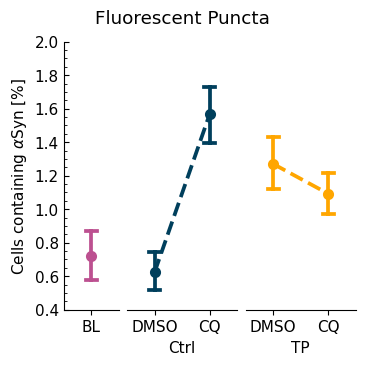

In [6]:
def formatter(x, pos):
        del pos
        return str(np.round(x*100, 3))

fig2,axs = plt.subplots(figsize = (3.54,3.54), ncols=3,sharey=True, sharex = False, layout = "constrained", width_ratios=(1,2,2))
plot_df = p.df.replace({"Ctrl":"DMSO","X":"Ctrl"})
plot_df["Group1"] = plot_df["Group1"].replace({"BL":" "})
colors = ["#bc5090","#003f5c","#ffa600"]
for i, g in enumerate([" ","Ctrl","TP"]):
     ax = axs[i]
     # ax = sns.barplot(data = p.df.loc[p.df["Group1"] == g,:],
     #                x = "Group2",
     #                y = "puncta",
     #                hue = "Group2",
     #                legend = False,
     #                ax = ax,
     #                palette = [colors[i]],
     #                seed = 888,
     #                alpha = 1,
     #                capsize = 0.2,
     #                err_kws = {
     #                     "linewidth": 1,
     #                     "color":"0"
     #                })
     # ax = sns.barplot(data = p.df.loc[p.df["Group1"] == g,:],
     #                x = "Group2",
     #                y = "puncta",
     #                ax = ax,
     #                color = "k",
     #                fill = False,
     #                linewidth = 1,
     #                errorbar = None)
     ax = sns.pointplot(data = plot_df.loc[plot_df["Group1"] == g,:],
                    x = "Group2",
                    y = "puncta",
                    ax = ax,
                    color = colors[i],
                    marker="o", markersize=5, markeredgewidth=3,
        capsize = 0.2, linestyles="--")
     ax = prettify(ax,
               title = "",
               x = (g,""),
               y = (r"Cells containing $\alpha$Syn","%"))
     # ax.set_xticklabels(["Ctrl","TP","FY"])
     ax.tick_params(axis = "x",direction = "out")
#      ax.tick_params(axis = "y",which="both",direction = "out")
     ax.tick_params(bottom = True)
     ax.set_ylim(0.004, 0.02)
     if i > 0:
        ax.spines[['left']].set_visible(False)
        ax.tick_params(which = "both", left = False)


        # ax.xaxis.set_major_formatter(formatter)
        ax.yaxis.set_major_formatter(formatter)
fig2.suptitle("Fluorescent Puncta")
# fig2.subplots_adjust(wspace=0.2, hspace=0)
fig2.savefig("Fig7_points.svg", format = "svg")

In [7]:
def normalize(d):
    norm = d.loc[np.logical_and(d["Group1"]=="X", d["Group2"]=="DMSO"),"aSyn_rel"].values[0]
    return d.aSyn_rel / norm


d = result().read(r"E:\diploma_thesis\Data\6. Inhibition Plasmid-mediated degradation increases exocytosis of GFP-tagged α-Synuclein\WB\Results.csv")
d.df["aSyn_norm"] = d.df.groupby("Try")[["aSyn_rel","Group1","Group2"]].apply(normalize).reset_index("Try").iloc[:,-1]
d.df.head()

,Unnamed: 0,Lane,aSyn,Ponceau,Group1,Group2,aSyn_rel,Ponceau_rel,aSyn_norm_X,Ponceau_norm_X,aSyn_norm_DMSO,Ponceau_norm_DMSO,Try,aSyn_norm
0,0,1,15584.962,16779.083,X,DMSO,0.928833,16779.083,1.000000,1.000000,1.000000,1.000000,1,1.000000
1,1,2,19256.376,17164.083,X,CQ,1.121899,17164.083,1.000000,1.000000,1.207860,1.022945,1,1.207860
2,2,3,18682.669,17378.255,X,BAF,1.075060,17378.255,1.000000,1.000000,1.157431,1.035709,1,1.157431
3,3,4,10588.134,13846.669,TP,DMSO,0.764670,13846.669,0.823259,0.825234,1.000000,1.000000,1,0.823259
4,4,5,17930.205,17596.205,TP,CQ,1.018981,17596.205,0.908264,1.025176,1.332576,1.270790,1,1.097056


In [8]:
d.df = d.df.loc[d.df["Try"]==1]
d.summarize(values = "aSyn_norm", groups = ["Group1","Group2"])

mean   sd     ci_lo     ci_hi
Group1 Group2                                   
X      DMSO    1.000000  0.0  1.000000  1.000000
       CQ      1.207860  0.0  1.207860  1.207860
       BAF     1.157431  0.0  1.157431  1.157431
TP     DMSO    0.823259  0.0  0.823259  0.823259
       CQ      1.097056  0.0  1.097056  1.097056
       BAF     0.955884  0.0  0.955884  0.955884
FY     DMSO    0.601037  0.0  0.601037  0.601037
       CQ      1.435824  0.0  1.435824  1.435824
       BAF     1.205557  0.0  1.205557  1.205557

c:\Users\Raphael\mambaforge\envs\diplomathesis\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\Raphael\mambaforge\envs\diplomathesis\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


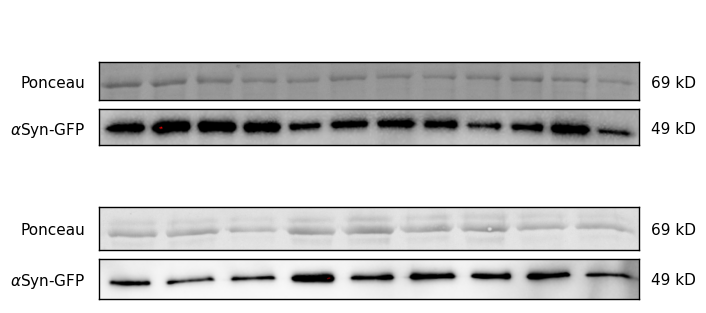

In [9]:
import skimage as ski
from skimage.transform import hough_line, hough_line_peaks
from skimage.color import rgb2gray
import scipy.ndimage as ndi
from sklearn.cluster import KMeans



class WesternBlot:
    
    def __init__(self, border = 0.1,
                 linewidth = 1) -> None:
        self.linewidth = linewidth
        self.border = border
        self.x= 12+2*border
        self.y = border
        self.images = {}
        self.lines = []
        self.minor = None
        self.lane_params = pd.DataFrame(
            columns = [
                "height",
                "y_min",
                "weight",
                "protein"
            ]
        )
        self.label_params = {}
        pass
    
    def add_lane(self, 
                 image = None,
                 protein = "???",
                 weight = 0,
                 id = None):
        if type(image) == str:
            image = ski.io.imread(image)
        if id == None:
            id = len(self.images)
        self.images[id] = image
        height = (image.shape[0]/image.shape[1]) * (self.x - 2*self.border)
        self.lane_params.loc[id, "height"] = height
        self.lane_params.loc[id, "y_min"] = self.y
        self.lane_params.loc[id, "protein"] = protein
        self.lane_params.loc[id, "weight"] = f"{str(weight)} kD"
        self.y += (height + 2*self.border)
        return self
    
    def extract_points(self, image):
        gray  = rgb2gray(image)
        t = gray < ski.filters.threshold_otsu(gray)
        labeled = ndi.label(t)[0]
        rp = (pd.DataFrame(data=ski.measure.regionprops_table(labeled, properties=("area","centroid")))
            .sort_values("area", ascending=False)
            .sort_values("centroid-1", ascending=True))
        return rp["centroid-1"].values/image.shape[1]
    
    def get_locations(self, n, id):
        points =np.concatenate([self.extract_points(image) for image in self.images.values()])
        return KMeans(n_clusters = n).fit(points.reshape(-1, 1)).cluster_centers_.ravel()
        
    
    def edit_multilevel_labels(self, labels):
        major = labels[0]
        for i in range(1,labels.shape[0]):
            fill_array = np.chararray(labels[0].shape).fill("\n")
            major = (major, fill_array)
            lines_rel = [(np.min(np.argwhere(labels[i] == x)),
                          np.max(np.argwhere(labels[i] == x)),
                          i)
                         for x in np.unique(labels[i])]
            for tup in lines_rel:
                pos = np.mean(np.array([tup[0],tup[1]]))
                
        return major
    
    def add_labels(self, labels,
                   locations = None,
                   id = 0):
        if locations == None:
            self.label_loc = np.sort(self.get_locations(len(labels), id)*(self.x - 2* self.border) + self.border)
        else: self.label_loc = locations
        self.labels = labels
        return self
    
    def plot_lane(self, ax, id, y_min, h):
        inset = ax.inset_axes([self.border, 
                                   y_min,
                                   self.x-2*self.border,
                                   h],
                                  transform = ax.transData)
        ex_in = (0, self.x-2*self.border, 0, h)
        inset.imshow(self.images[id],
                        extent=ex_in)
        inset.tick_params(bottom = False,
                            left = False,
                            labelbottom = False,
                            labelleft = False)
        for side in ["top","bottom","left","right"]:
            inset.spines[side].set_linewidth(self.linewidth)
        return ax
    
    def plot(self, ax = None
                ) -> plt.axis:
        ex = (0, self.x, 0, self.y-self.border)
        if ax == None:
            ax = plt.gca()
        ax.imshow(255 * np.ones([100,100,3],dtype=np.uint8),
                  extent=ex, origin="lower")
        for id, lane in self.lane_params.iterrows():
            h = lane["height"]
            y_min = lane["y_min"]
            ax = self.plot_lane(ax, id, y_min, h)
        ax.tick_params(which = "major", bottom = False,
                              left = False,
                              labelbottom = False,
                              labelleft = True,
                              labeltop = True)
        ax.tick_params(which = "minor",
                       left = False,
                        labelleft = False,
                        labelright = True)
        lp = self.lane_params.copy()
        lp["label_y"] = lp["y_min"] + lp["height"]/2
        ax.set_yticks(lp["label_y"].tolist(), lp["protein"].tolist())
        ax.set_yticks((lp["label_y"] + 0.001).tolist(), lp["weight"].tolist(), minor = True)
        ax.set_xticks(self.label_loc, self.labels,
                      fontsize = "large")
        for side in ["top","bottom","left","right"]:
            ax.spines[side].set_visible(False)
        return ax

image1 = ski.io.imread(r"E:\diploma_thesis\Data\6. Inhibition Plasmid-mediated degradation increases exocytosis of GFP-tagged α-Synuclein\WB\ImgF1\0_Ponceau.tif")
image2 = ski.io.imread(r"E:\diploma_thesis\Data\6. Inhibition Plasmid-mediated degradation increases exocytosis of GFP-tagged α-Synuclein\WB\ImgF1\1_aSyn.tif")
fig3, axs = plt.subplots(figsize = (3.54*2,3.54), nrows=2)
ax = axs[0]
wb = (WesternBlot(border = 0.1)
      .add_lane(image = image2,
                protein =r"$\alpha$Syn-GFP",
                weight = 49)
      .add_lane(image = image1,
                protein ="Ponceau",
                weight = "69")
      .add_labels([" \n "]*9)
      .plot(ax))


image1 = ski.io.imread(r"E:\diploma_thesis\Data\6. Inhibition Plasmid-mediated degradation increases exocytosis of GFP-tagged α-Synuclein\WB\ImgF2\0_Ponceau.tif")
image2 = ski.io.imread(r"E:\diploma_thesis\Data\6. Inhibition Plasmid-mediated degradation increases exocytosis of GFP-tagged α-Synuclein\WB\ImgF2\1_aSyn.tif")
ax = axs[1]

wb = (WesternBlot(border = 0.1)
      .add_lane(image = image2,
                protein =r"$\alpha$Syn-GFP",
                weight = 49)
      .add_lane(image = image1,
                protein ="Ponceau",
                weight = "69")
      .add_labels([" \n "]*9)
      .plot(ax))


fig3.savefig("Fig57_WB.svg", format = "svg",bbox_inches='tight')

In [10]:
elisa_dir = r"E:\diploma_thesis\Data\6. Inhibition Plasmid-mediated degradation increases exocytosis of GFP-tagged α-Synuclein\ELISA"

def read_elisa(dir):
    elisa =( pd.read_excel(
    os.path.join(dir, "ELISA.xlsx"),
    skiprows=9,
    nrows=9
    ).set_index("Abs")
    .melt(ignore_index=False)
    .reset_index()
    .rename(columns={
        "Abs": "Row",
        "variable": "Column",
        "value": "absorbtion"
    })
    .set_index(["Row","Column"]))
    labels = (pd.read_excel(
        os.path.join(dir, "Labels.xlsx")
    ).set_index(["Row","Column"]))
    df = elisa.join(labels).dropna()
    return df

read_elisa(os.path.join(elisa_dir,str(1))).head()

,,absorbtion,Group1,Group2,Group3
Row,Column,,,,
A,1,0.1733,BL,BL,Cell
B,1,0.1578,X,DMSO,Cell
C,1,0.1021,X,CQ,Cell
D,1,0.0689,TP,DMSO,Cell
E,1,0.1246,TP,CQ,Cell


In [11]:
dfs = []
for rep in range(9):
    if str(rep) not in os.listdir(elisa_dir):
        continue
    dir = os.path.join(elisa_dir,str(rep))
    rep_df = read_elisa(dir).reset_index()
    rep_df["rep"] = rep
    dfs.append(rep_df)
df = pd.concat(dfs, ignore_index=True)
df.head()
    

,Row,Column,absorbtion,Group1,Group2,Group3,rep
0,A,1,0.1733,BL,BL,Cell,1
1,B,1,0.1578,X,DMSO,Cell,1
2,C,1,0.1021,X,CQ,Cell,1
3,D,1,0.0689,TP,DMSO,Cell,1
4,E,1,0.1246,TP,CQ,Cell,1


In [12]:
def get_rel(tab, value = None,
            control = {}):
    ctrl_mean = tab.set_index(list(control.keys())).loc[tuple(control.values()),value].mean()
    val_rel = tab[value]/ctrl_mean
    return val_rel
 
def blank_sub(tab, value = None,
            control = {}):
    blank_mean = tab.set_index(list(control.keys())).loc[tuple(control.values()),value].mean()
    val_sub = tab[value] - blank_mean
    return val_sub

df["abs_rel"] = df.groupby(["rep","Group3"]).apply(lambda d: get_rel(d,
                                                                     value = "absorbtion",
                                                                     control = {
                                                                        "Group1":"X",
                                                                        "Group2":"DMSO"
                                                                     })).reset_index(["rep","Group3"]).iloc[:,-1]
df["abs_sub"] = df.groupby(["rep","Group3"]).apply(lambda d: blank_sub(d,
                                                                     value = "abs_rel",
                                                                     control = {
                                                                        "Group1":"BL",
                                                                        "Group2":"BL"
                                                                     })).reset_index(["rep","Group3"]).iloc[:,-1]
df = df.set_index(["rep","Row","Column"])
cell_df = df.loc[df["Group3"]=="Cell",:]
medium_df = df.loc[df["Group3"]=="Medium",:]
df.head()

C:\Users\Raphael\AppData\Local\Temp\ipykernel_22576\1758918920.py:3: PerformanceWarning: indexing past lexsort depth may impact performance.
  ctrl_mean = tab.set_index(list(control.keys())).loc[tuple(control.values()),value].mean()
C:\Users\Raphael\AppData\Local\Temp\ipykernel_22576\1758918920.py:3: PerformanceWarning: indexing past lexsort depth may impact performance.
  ctrl_mean = tab.set_index(list(control.keys())).loc[tuple(control.values()),value].mean()
C:\Users\Raphael\AppData\Local\Temp\ipykernel_22576\1758918920.py:3: PerformanceWarning: indexing past lexsort depth may impact performance.
  ctrl_mean = tab.set_index(list(control.keys())).loc[tuple(control.values()),value].mean()
C:\Users\Raphael\AppData\Local\Temp\ipykernel_22576\1758918920.py:3: PerformanceWarning: indexing past lexsort depth may impact performance.
  ctrl_mean = tab.set_index(list(control.keys())).loc[tuple(control.values()),value].mean()
C:\Users\Raphael\AppData\Local\Temp\ipykernel_22576\1758918920.py:3:

absorbtion Group1 Group2 Group3   abs_rel   abs_sub
rep Row Column                                                     
1   A   1           0.1733     BL     BL   Cell  1.283070  0.053801
    B   1           0.1578      X   DMSO   Cell  1.168312 -0.060958
    C   1           0.1021      X     CQ   Cell  0.755923 -0.473346
    D   1           0.0689     TP   DMSO   Cell  0.510118 -0.719151
    E   1           0.1246     TP     CQ   Cell  0.922507 -0.306762

[ 0.05380059 -0.06095755 -0.4733465  -0.71915104 -0.30676209  0.03973346
 -0.26159921 -0.54146101 -0.67176703 -0.73766041 -0.09353406 -0.36525173
 -0.29195459 -0.76431392 -0.35192498  0.0584638  -0.06042074 -0.47284736
 -0.71428571 -0.3231409   0.04085127 -0.25856164 -0.54036204 -0.67612524
 -0.73997065 -0.09931507 -0.36937378 -0.25342466 -0.75464775 -0.3165362
 -0.04284977  0.44037171  0.55962829 -0.0738255   0.05317501  0.0191017
  0.01600413  0.25296851  0.04233351  1.15281363  0.02374806  0.07330924
  0.42488384 -0.03975219  0.63397006 -0.04627329 -0.01832298  0.72049689
  1.79565217  1.38571429 -0.06770186  0.25186335  0.32826087  0.81832298
  1.1378882   0.11397516  1.32795031 -0.05559006  1.59254658  1.47236025]
[ 0.05380059 -0.06095755 -0.4733465  -0.71915104 -0.30676209  0.03973346
 -0.26159921 -0.54146101 -0.67176703 -0.73766041 -0.09353406 -0.36525173
 -0.29195459 -0.76431392 -0.35192498  0.0584638  -0.06042074 -0.47284736
 -0.71428571 -0.3231409   0.04085127 -0.25856164 -0.

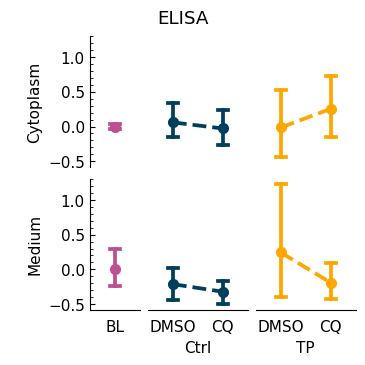

In [13]:
def formatter(x, pos):
        del pos
        return str(np.round(x*100, 3))

fig4,axs = plt.subplots(figsize = (3.54,3.54), nrows = 2, ncols=3,sharey=True, sharex = False, layout = "constrained", width_ratios=(1,2,2))

colors = ["#bc5090","#003f5c","#ffa600"]
sub_ax = axs[0]
cell_df = df.loc[df["Group3"]=="Cell",:].replace({"X":"Ctrl"})
cell_df["Group1"] = cell_df["Group1"].replace({"BL":" "})
print(cell_df["abs_sub"].values)
for i, g in enumerate([" ","Ctrl","TP"]):
     ax = sub_ax[i]

     ax = sns.pointplot(data = cell_df.loc[cell_df["Group1"] == g,:],
                    x = "Group2",
                    y = "abs_sub",
                    ax = ax,
                    color = colors[i],
                    marker="o", markersize=5, markeredgewidth=3,
        capsize = 0.2, linestyles="--")
     ax = prettify(ax,
               title = "",
               x = ("",""),
               y = ("\nCytoplasm",""))
     ax.tick_params(axis = "x",direction = "out")
#      ax.tick_params(axis = "y",which="both",direction = "out")

     ax.tick_params(bottom = False, labelbottom = False)
#      ax.set_ylim(0.004, 0.02)
     ax.spines[['bottom']].set_visible(False)
     if i > 0:
        ax.spines[['left']].set_visible(False)
        ax.tick_params(which = "both", left = False)


        # ax.xaxis.set_major_formatter(formatter)
     #    ax.yaxis.set_major_formatter(formatter)
     
sub_ax = axs[1]
medium_df = df.loc[df["Group3"]=="Medium",:].replace({"X":"Ctrl"})
medium_df["Group1"] = medium_df["Group1"].replace({"BL":" "})
print(cell_df["abs_sub"].values)
for i, g in enumerate([" ","Ctrl","TP"]):
     ax = sub_ax[i]
     ax = sns.pointplot(data = medium_df.loc[medium_df["Group1"] == g,:],
                    x = "Group2",
                    y = "abs_sub",
                    ax = ax,
                    color = colors[i],
                    marker="o", markersize=5, markeredgewidth=3,
        capsize = 0.2, linestyles="--")
     ax = prettify(ax,
               title = "",
               x = (g,""),
               y = ("\nMedium",""))
     ax.tick_params(axis = "x",direction = "out")
#      ax.tick_params(axis = "y",which="both",direction = "out")

     ax.tick_params(bottom = False)
#      ax.set_ylim(0.004, 0.02)
     if i > 0:
        ax.spines[['left']].set_visible(False)
        ax.tick_params(which = "both", left = False)


        # ax.xaxis.set_major_formatter(formatter)
     #    ax.yaxis.set_major_formatter(formatter)
fig4.suptitle("ELISA")
# fig2.subplots_adjust(wspace=0.2, hspace=0)
fig4.savefig("Fig7_elisa.svg", format = "svg")

In [23]:
cell_res = result()
cell_res.df = df.loc[df["Group3"]=="Cell",:]
cell_res.summarize(values = "abs_sub", groups = ["Group1","Group2"]).round(2)

mean    sd  ci_lo  ci_hi
Group1 Group2                          
X      DMSO    0.06  0.45  -0.15   0.34
       CQ     -0.03  0.44  -0.25   0.23
TP     DMSO   -0.01  0.89  -0.48   0.56
       CQ      0.25  0.81  -0.15   0.72
BL     BL      0.00  0.06  -0.04   0.03

In [24]:
ex_res = result()
ex_res.df = df.loc[df["Group3"]=="Medium",:]
ex_res.summarize(values = "abs_sub", groups = ["Group1","Group2"]).round(2)

mean    sd  ci_lo  ci_hi
Group1 Group2                          
X      DMSO   -0.21  0.52  -0.45   0.03
       CQ     -0.32  0.37  -0.49  -0.16
TP     DMSO    0.24  1.90  -0.42   1.36
       CQ     -0.19  0.61  -0.44   0.13
BL     BL     -0.00  0.61  -0.25   0.30